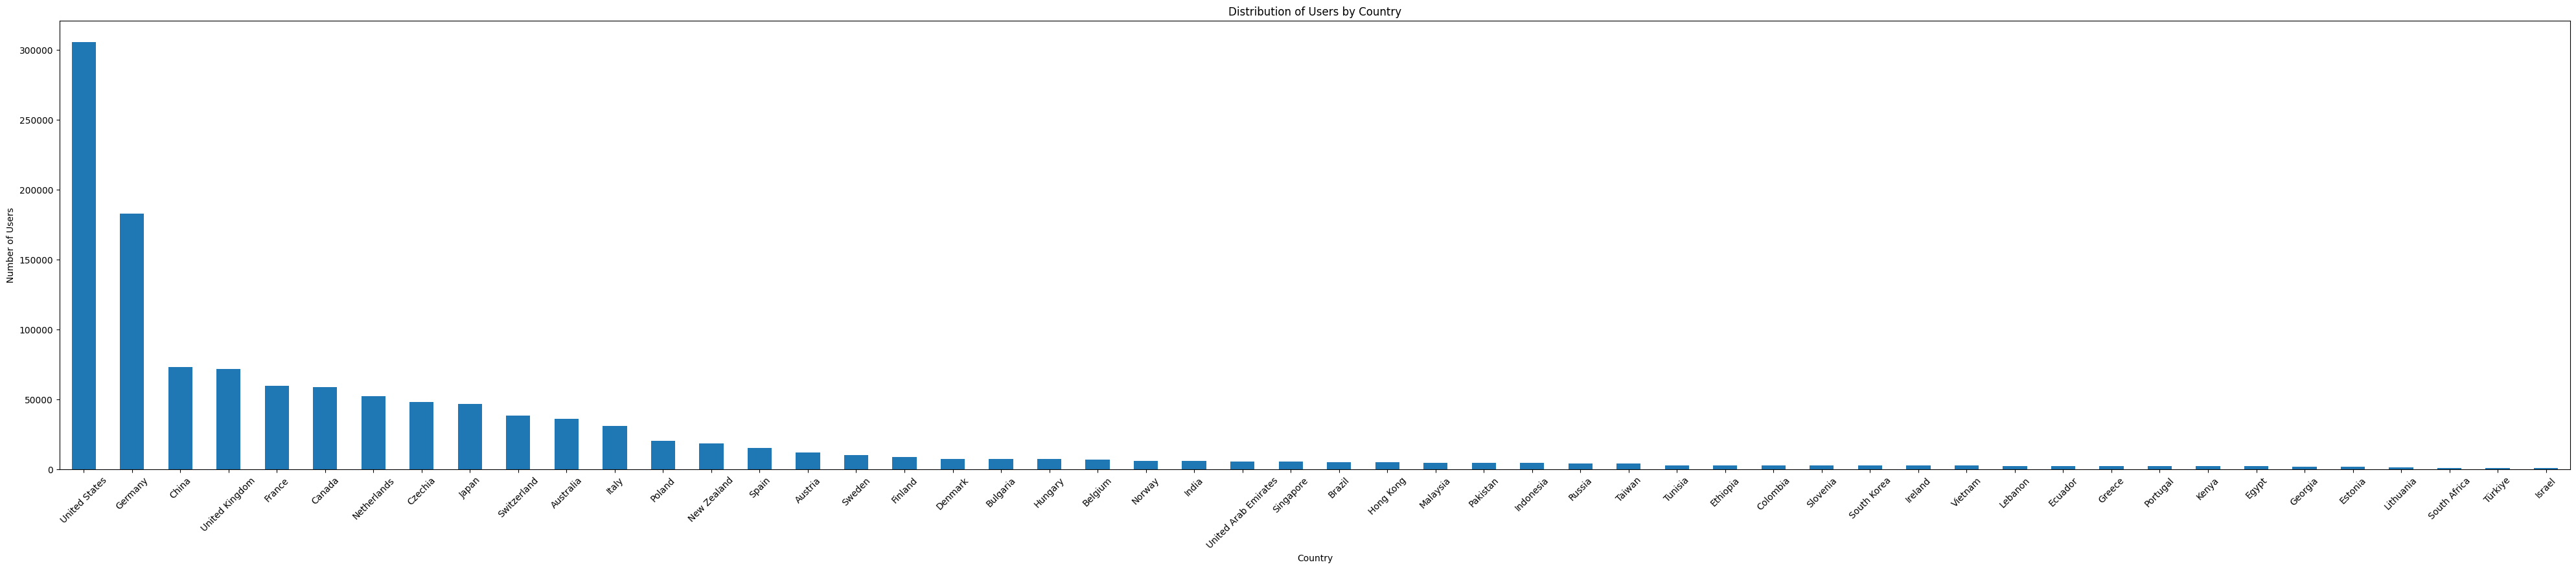

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# 加载CSV文件
df = pd.read_csv("D:/GIT1/Homework/src/data/userdata/users_combined_info_500.csv")
# 数据清洗：移除缺失的地理信息或相关信息
df_clean = df.dropna(subset=["location", "country"])
# 1. 人口统计分析：国家和地区分布
country_distribution = df_clean["country"].value_counts()
# 可视化国家分布
plt.figure(figsize=(50,9))
country_distribution.plot(kind='bar')
plt.title("Distribution of Users by Country")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()


c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22530 (\N{CJK UNIFIED IDEOGRAPH-5802}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20551 (\N{CJK UNIFIED IDEOGRAPH-5047}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86139\AppData\Local\Programs\Python\Python312\Lib\site-packages

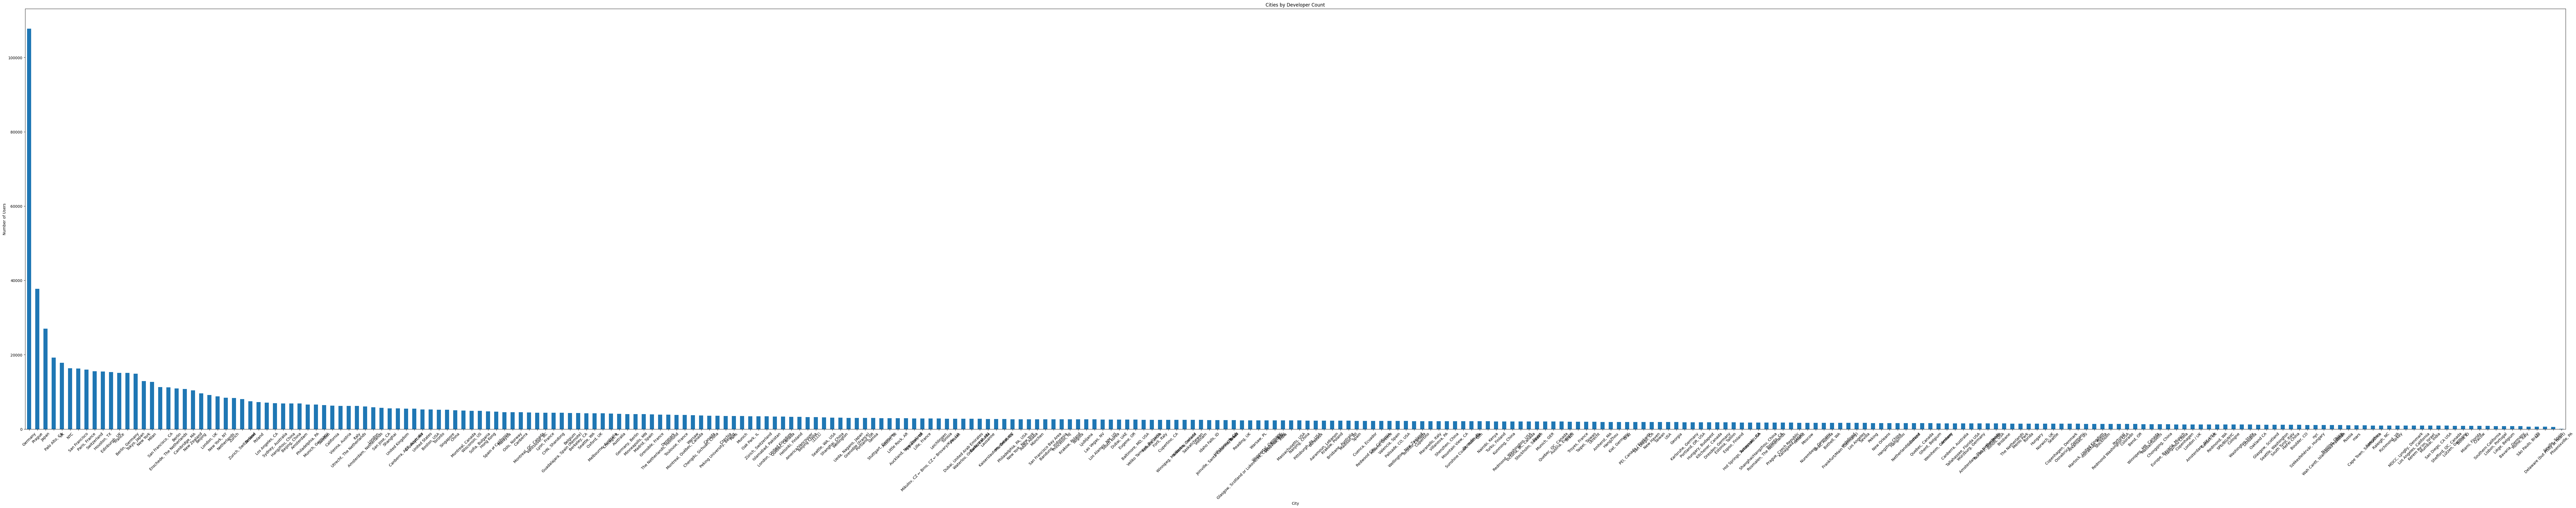

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# 清理 location 列中的特殊字符（例如移除美元符号）
df_clean['location'] = df_clean['location'].str.replace(r'[$]', '', regex=True)
# 统计每个城市的开发者数量
city_distribution = df_clean["location"].value_counts()
# 可视化城市分布
plt.figure(figsize=(120,20))  # 修改 figsize 使其更加合适
city_distribution.plot(kind='bar')
plt.title("Cities by Developer Count")
plt.xlabel("City")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

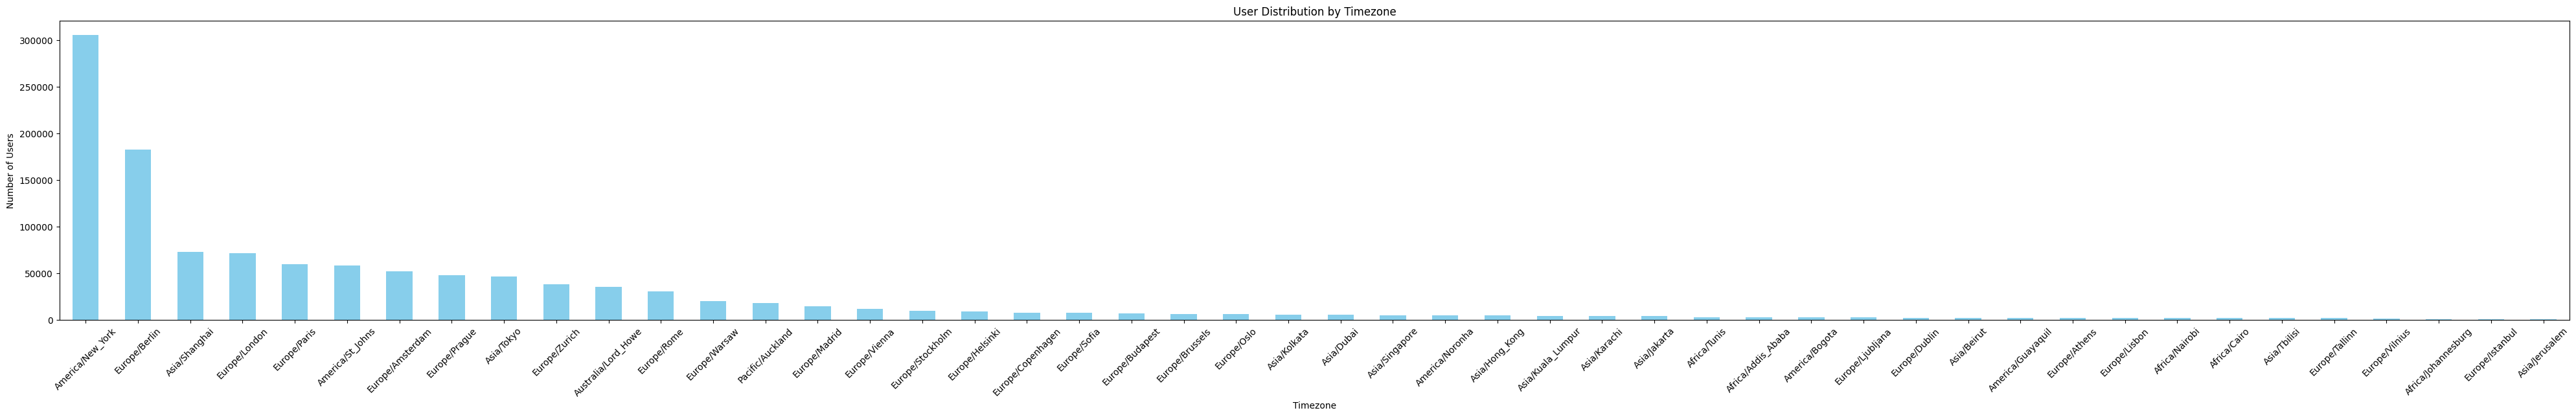

In [ ]:
# 3. 时区分布：如果通过国家获得经纬度数据，
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import pycountry
from datetime import datetime
# 从 CSV 文件读取数据
df = pd.read_csv("D:/GIT1/Homework/src/data/userdata/users_combined_info_500.csv")
# 获取所有国家的名称和对应的ISO 3166-1 alpha-2代码
country_to_code = {country.name: country.alpha_2 for country in pycountry.countries}
# 1. 将 event_time 转换为 datetime 类型，并确保包含时区信息
df['event_time'] = pd.to_datetime(df['event_time'])
# 2. 通过国家名获取ISO 3166-1 alpha-2代码
def get_timezone_by_country(country):
    try:
        # 获取国家对应的ISO代码
        country_code = country_to_code.get(country, None)
        if country_code:
            # 获取国家对应的时区列表
            timezones = pytz.country_timezones(country_code)
            if timezones:
                # 返回第一个时区作为默认时区（通常是首都的时区）
                return timezones[0]
        return None
    except Exception as e:
        print(f"Error getting timezone for {country}: {e}")
        return None
# 3. 获取时区并转换事件时间
df['timezone'] = df['country'].apply(get_timezone_by_country)
# 4. 将 event_time 转换为对应时区的时间
def convert_to_timezone(row):
    if row['timezone'] is not None:
        local_tz = pytz.timezone(row['timezone'])
        local_time = row['event_time'].astimezone(local_tz)
        return local_time
    return row['event_time']
# 应用时区转换
df['local_event_time'] = df.apply(convert_to_timezone, axis=1)
# 5. 统计每个时区的用户数量
timezone_distribution = df['timezone'].value_counts()
# 可视化时区分布
plt.figure(figsize=(50,6))
timezone_distribution.plot(kind='bar', color='skyblue')
plt.title("User Distribution by Timezone")
plt.xlabel("Timezone")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

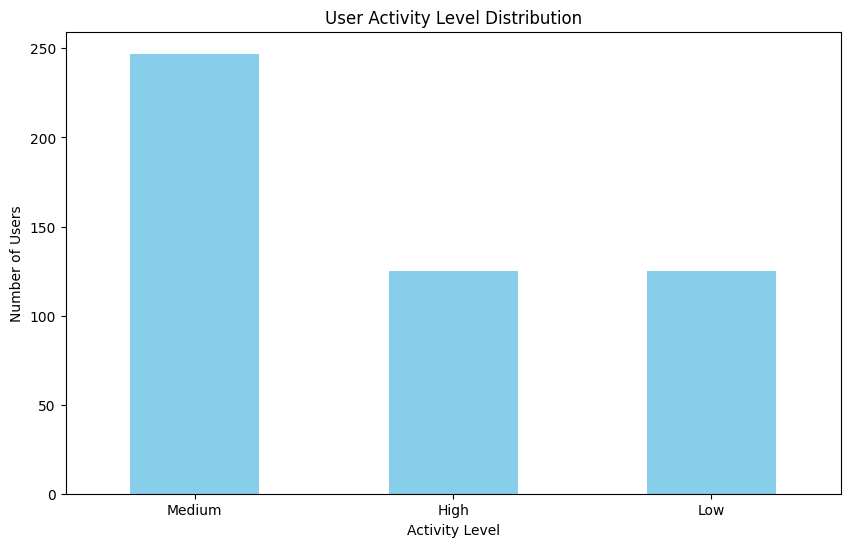

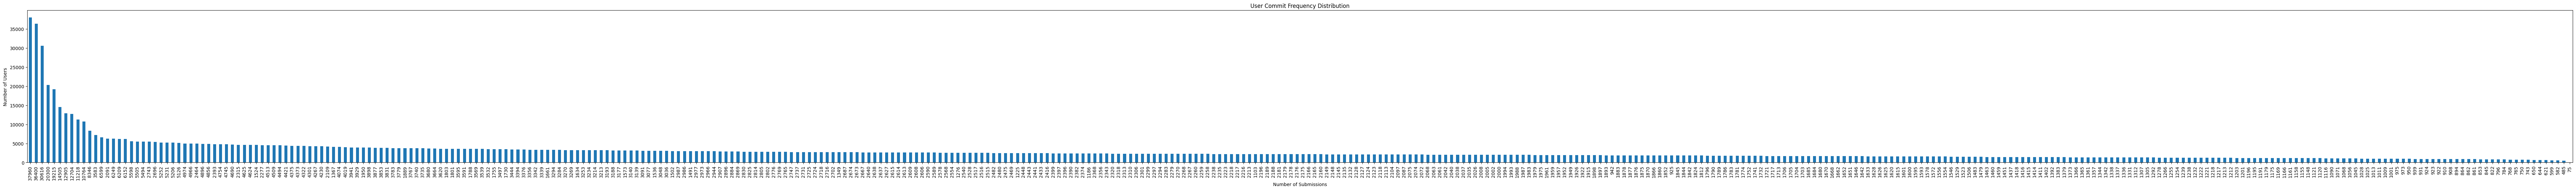

In [45]:
# 4. 协作行为分析：提交频率
# 假设数据中有"submit_count"（提交次数）字段，若没有，则使用用户ID进行分组
# 例如通过计算每个用户提交次数来分析
# 1. 统计每个用户的提交次数（假设每一行数据代表一次提交）
user_submit_count = df.groupby('user_id').size()
# 2. 统计高活跃和低活跃用户
# 可以通过分位数来划分活跃度
high_activity_threshold = user_submit_count.quantile(0.75)  # 75%分位数
low_activity_threshold = user_submit_count.quantile(0.25)   # 25%分位数
# 根据提交次数划分用户
user_submit_count = user_submit_count.reset_index(name='submit_count')
user_submit_count['activity_level'] = 'Medium'
user_submit_count.loc[user_submit_count['submit_count'] >= high_activity_threshold, 'activity_level'] = 'High'
user_submit_count.loc[user_submit_count['submit_count'] <= low_activity_threshold, 'activity_level'] = 'Low'
# 3. 可视化用户活跃度分布
plt.figure(figsize=(10,6))
activity_level_counts = user_submit_count['activity_level'].value_counts()
activity_level_counts.plot(kind='bar', color='skyblue')
plt.title("User Activity Level Distribution")
plt.xlabel("Activity Level")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()
# 创建假设的提交次数数据：我们使用 user_id 来计算每个用户的活跃度（提交次数）
df_clean['submit_count'] = df_clean.groupby("user_id")["user_id"].transform("count")
# 提交频率统计
submit_frequency = df_clean['submit_count'].value_counts()
# 可视化提交频率
plt.figure(figsize=(100,6))
submit_frequency.plot(kind='bar')
plt.title("User Commit Frequency Distribution")
plt.xlabel("Number of Submissions")
plt.ylabel("Number of Users")
plt.show()

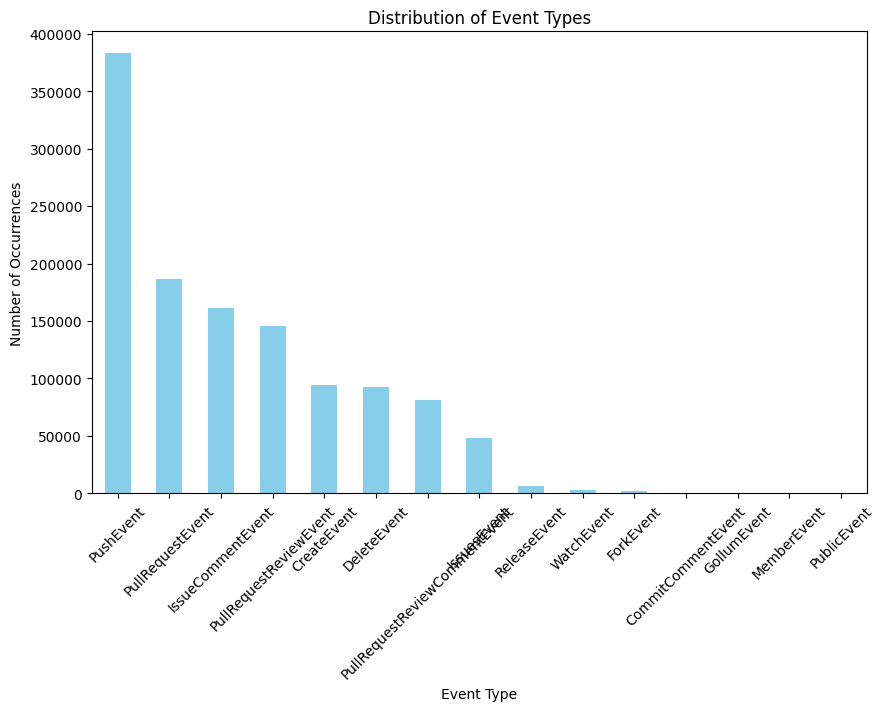

In [46]:
#3.用户参与的事件类型分布
#通过分析每个用户的 event_type 字段，了解用户参与的不同类型活动。
# 统计每种事件类型的频率
event_type_distribution = df_clean['event_type'].value_counts()
# 可视化事件类型分布
plt.figure(figsize=(10,6))
event_type_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.show()


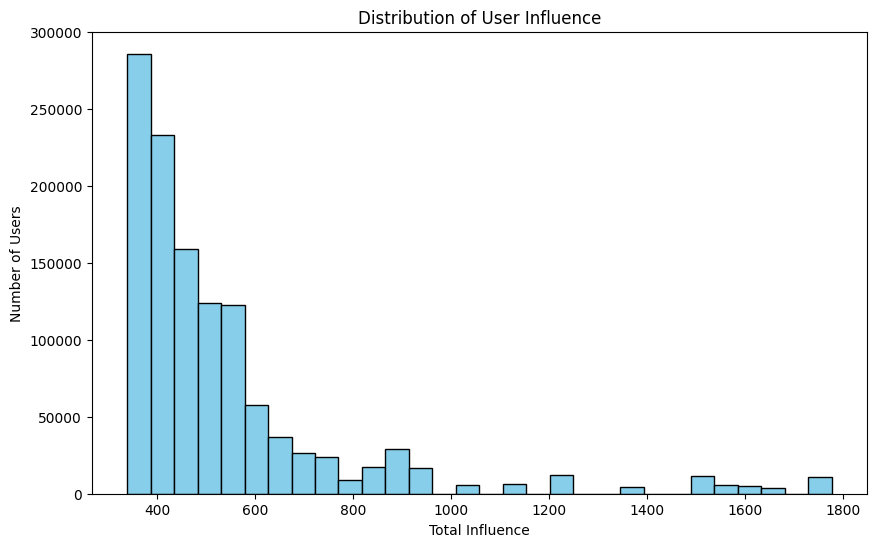

Top 10 Users by Influence:
      user_id    name  total_influence
0      663432  bdraco      1776.967163
7180   663432  bdraco      1776.967163
7172   663432  bdraco      1776.967163
7173   663432  bdraco      1776.967163
7174   663432  bdraco      1776.967163
7175   663432  bdraco      1776.967163
7176   663432  bdraco      1776.967163
7177   663432  bdraco      1776.967163
7178   663432  bdraco      1776.967163
7179   663432  bdraco      1776.967163


In [47]:
#3.数据中有类似 total_influence 的字段，可以用来度量用户在平台上的影响力。
# 假设 df_clean 中有 total_influence 字段，用于衡量用户影响力
# 可视化用户影响力分布
plt.figure(figsize=(10,6))
df_clean['total_influence'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of User Influence")
plt.xlabel("Total Influence")
plt.ylabel("Number of Users")
plt.show()

# 输出影响力较高的前10个用户
high_influence_users = df_clean[['user_id', 'name', 'total_influence']].sort_values(by='total_influence', ascending=False).head(10)
print("Top 10 Users by Influence:")
print(high_influence_users)
